In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
string.punctuation
nltk.download('stopwords')
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,LSTM,Embedding
from tensorflow.keras.models import  Model
import io

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
uploaded = files.upload()

Saving labeled_data.csv to labeled_data (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['labeled_data.csv']),encoding='ISO-8859-1')

In [0]:
df1=df.copy()

In [5]:
def remove_mentionUrls(text):
  tweet_out = re.sub(r'@[A-Za-z0-9]+','',text)
  re.sub('https?://[A-Za-z0-9./]+','',tweet_out)
  return tweet_out
def remove_nonalphanumeric(text):
  text_out ="".join([char for char in text if char not in string.punctuation])
  return text_out
df1['Tweets_nourl']=df1['tweet'].apply(lambda x: remove_mentionUrls(x))
df1['Tweets_punc']=df1['Tweets_nourl'].apply(lambda x: remove_nonalphanumeric(x))
stop = stopwords.words('english')
test = pd.DataFrame(df1)
test.columns = ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet','Tweets_nourl',
       'Tweets_punc']

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['tweet_without_stopwords'] = test['Tweets_punc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test)

       Unnamed: 0  ...                            tweet_without_stopwords
0               0  ...  RT As woman shouldnt complain cleaning house a...
1               1  ...  RT boy dats coldtyga dwn bad cuffin dat hoe 1s...
2               2  ...  RT Dawg RT You ever fuck bitch start cry You c...
3               3  ...                RT GAnderson based look like tranny
4               4  ...  RT The shit hear might true might faker bitch ...
...           ...  ...                                                ...
24778       25291  ...  yous muthafin lie 8220 Pearls emanuel right Hi...
24779       25292  ...  youve gone broke wrong heart baby drove rednec...
24780       25294  ...  young buck wanna eat dat nigguh like I aint fu...
24781       25295  ...                  youu got wild bitches tellin lies
24782       25296  ...  Ruffled Ntac Eileen Dahlia Beautiful color com...

[24783 rows x 10 columns]


In [6]:
df1.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Tweets_nourl,Tweets_punc,tweet_without_stopwords
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,RT As a woman you shouldnt complain about cl...,RT As woman shouldnt complain cleaning house a...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,RT boy dats coldtyga dwn bad for cuffin dat ...,RT boy dats coldtyga dwn bad cuffin dat hoe 1s...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...,RT Dawg RT You ever fuck a bitch and she st...,RT Dawg RT You ever fuck bitch start cry You c...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT _G_Anderson: _based she look like...,RT GAnderson based she look like a tranny,RT GAnderson based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,RT The shit you hear about me might be true ...,RT The shit hear might true might faker bitch ...


In [0]:
#a=pd.DataFrame({'A': [0,1,2]})
#d={2:"neither",1:"offensive",0:"hate"}
df1['tweet_type'] = df1['class'].map({2:"neither",1:"offensive",0:"hate"})

In [0]:
df1

In [0]:
df1['tweet_type'].unique

In [0]:
data=df1[['tweet_without_stopwords','tweet_type']]

In [0]:
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


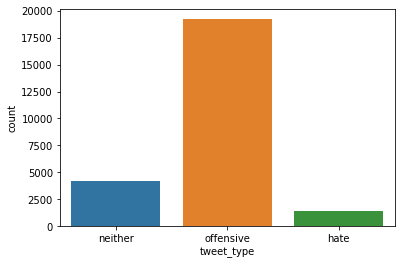

In [12]:
import seaborn as sns

sns.countplot(x='tweet_type', data=data)

In [0]:
x=data['tweet_without_stopwords']
y=data['tweet_type']
x = [str (item) for item in x]


In [0]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


y = label_encoder.fit_transform(y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)


x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [19]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-05-24 17:26:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-24 17:26:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-24 17:26:14--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [20]:
!pwd

/content


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:

from numpy import array
from numpy import asarray
from numpy import zeros
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

embeddings_dictionary = dict()
with io.open('glove.6B.300d.txt', encoding='utf8') as glove_file:



  for line in glove_file:

    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)
NUM_OF_EPOCHS=10 #hyperparameter
BATCH_SIZE=128
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=NUM_OF_EPOCHS,batch_size=BATCH_SIZE)

Train on 19826 samples, validate on 4957 samples
Epoch 1/10
19826/19826 [==============================] - 48s 2ms/step - loss: 0.6920 - accuracy: 0.7706 - val_loss: 0.6665 - val_accuracy: 0.7730
Epoch 2/10
19826/19826 [==============================] - 45s 2ms/step - loss: 0.6643 - accuracy: 0.7746 - val_loss: 0.6663 - val_accuracy: 0.7730
Epoch 3/10
19826/19826 [==============================] - 45s 2ms/step - loss: 0.6629 - accuracy: 0.7746 - val_loss: 0.6669 - val_accuracy: 0.7730
Epoch 4/10
19826/19826 [==============================] - 45s 2ms/step - loss: 0.6628 - accuracy: 0.7746 - val_loss: 0.6661 - val_accuracy: 0.7730
Epoch 5/10
19826/19826 [==============================] - 45s 2ms/step - loss: 0.6629 - accuracy: 0.7746 - val_loss: 0.6656 - val_accuracy: 0.7730
Epoch 6/10
19826/19826 [==============================] - 45s 2ms/step - loss: 0.6635 - accuracy: 0.7746 - val_loss: 0.6667 - val_accuracy: 0.7730
Epoch 7/10
19826/19826 [==============================] - 45s 2ms/ste

In [0]:
#score = model.evaluate(x_test, y_test, verbose=1)

#print("Test Score:", score[0])
#print("Test Accuracy:", score[1])

In [0]:
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#model.compile( loss = "categorical_crossentropy", 
               #optimizer = sgd, 
               #metrics=['accuracy']
             #)

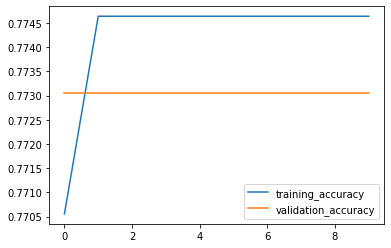

In [29]:
plt.plot(r.history['accuracy'], label='training_accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()
